# Assignment 1 - Machine Learning Models

Name: Sudip Shrestha \
Student ID: C0934400

Importing All the libraries in one place

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

1. Data Cleaning and Preprocessing

Loading dataset properly by implementing try except for error handling.

In [2]:
#Try except for error handling
try:
    #Loading dataset from csv file to dataframe
    fire_df = pd.read_csv('Algerian_forest_fires_cleaned.csv')
#Error handling when file not found
except FileNotFoundError:
    #Error message
    print("Error: The file you are trying to load does not exist.")
    exit()
#Error handling when file is empty
except pd.errors.EmptyDataError:
    #Error message
    print("Error: The file you are trying to load is empty.")
    exit()

Filling missing values with mean and median

In [3]:
#Filling missing values in dataset with mean and median
fire_df.fillna({
    'Temperature':fire_df['Temperature'].mean(),
    'RH': fire_df['RH'].mean(),
    'Ws': fire_df['Ws'].median(),
    'Rain': 0.0

}, inplace=True)

Converting Data types into integers

In [4]:
#Converting data types
fire_df['day'] = fire_df['day'].astype(int)
fire_df['month'] = fire_df['month'].astype(int)
fire_df['year'] = fire_df['year'].astype(int)

Removing duplicate values from dataset

In [5]:
#Removing duplicates
fire_df.drop_duplicates(inplace=True)

Validating value ranges for tempreture and humidity (rh)

In [6]:
#Validating ranges
fire_df = fire_df[(fire_df['RH'] <= 100) & (fire_df['Temperature'] > -50)]

Feature Selection and Engineering

Separating Date feature into year, month, day

In [7]:
#Feature Engineering
fire_df['Date'] = pd.to_datetime(fire_df[['year', 'month', 'day']])

Creating season feature using months

In [8]:
#Creating season feature
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

fire_df['Season'] = fire_df['month'].apply(get_season)

Dropping unused columns from the dataframe

In [9]:
#Dropping unused columns
fire_df.drop(['day', 'month', 'year', 'Region'], axis=1, inplace=True)

2. Data Visualization and Obervation

Data Visualization

1. Fire Weather Index (FWI) vs Temperature

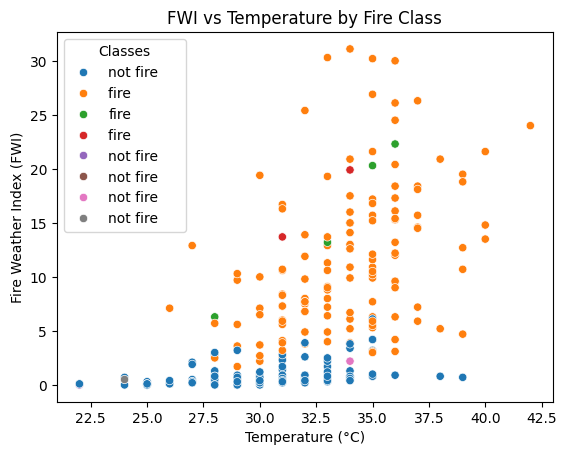

In [10]:
#Creating scatterplot using seaborn library
sns.scatterplot(data=fire_df, x='Temperature', y='FWI', hue='Classes')
plt.title('FWI vs Temperature by Fire Class')
plt.xlabel('Temperature (°C)')
plt.ylabel('Fire Weather Index (FWI)')
plt.show()


2. Relative Humidity vs FWI

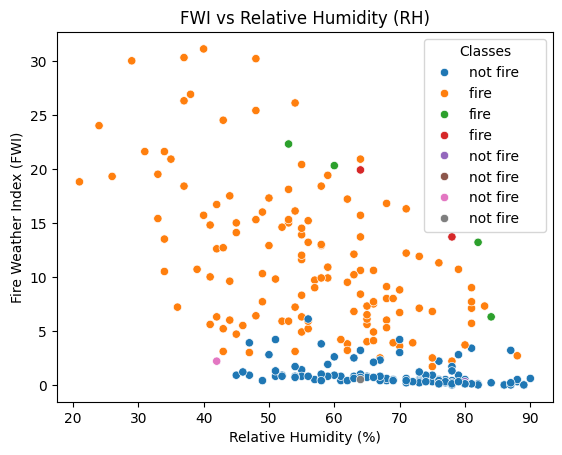

In [11]:
#Creating scatterplot with seaborn
sns.scatterplot(data=fire_df, x='RH', y='FWI', hue='Classes')
plt.title('FWI vs Relative Humidity (RH)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Fire Weather Index (FWI)')
plt.show()


3. Seasonal Fire Risk Box Plot

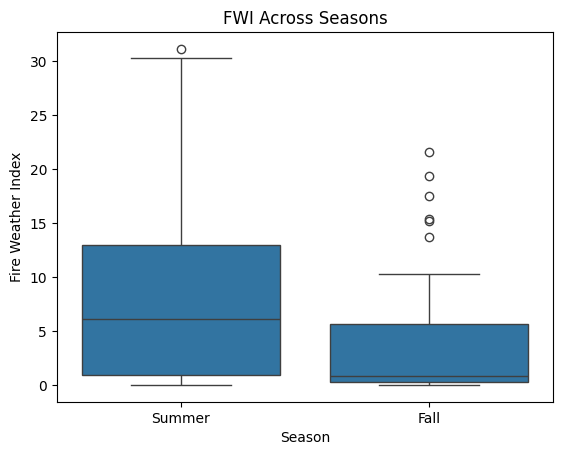

In [12]:
#Boxplot with seaborn
sns.boxplot(data=fire_df, x='Season', y='FWI')
plt.title('FWI Across Seasons')
plt.ylabel('Fire Weather Index')
plt.show()


Observations from the data visualizations

1. Fire Weather Index (FWI) increases with higher temperature, especially above 25°C.
2. Lower RH (<40%) corresponds to higher fire risk, visible in the scatterplot.
3. Fire risk is highest in summer, as shown in the seasonal boxplot.

3. Model Development and Analysis 

In [13]:

#Selecting Features and target
X = fire_df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]  # Choose relevant features
y = fire_df['FWI']

#Spliting data into train and test sets with 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Using multiple models
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

#Training the model and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} model training completed.")


Linear model training completed.
Ridge model training completed.
Lasso model training completed.
ElasticNet model training completed.


In [14]:
#Fitting the Linear Regression model (no hyperparameter tuning needed)
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

Hyperparameter tuning Ridge, Lasso, ElasticNet models and printing results

In [15]:
#HyperParameter tuing Ridge Regression
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)

#printing Values
print(f"Best Ridge alpha: {ridge_cv.best_params_}")
print(f"Best Ridge CV MSE: {-ridge_cv.best_score_:.4f}")

#Storing the best Ridge model with optimal aplha
ridge_model = ridge_cv.best_estimator_


Best Ridge alpha: {'alpha': 1.0}
Best Ridge CV MSE: 2.2610


In [16]:
#Hyperparameter tuning Lasso model
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_cv = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train_scaled, y_train)

#Printing values
print(f"Best Lasso alpha: {lasso_cv.best_params_}")
print(f"Best Lasso CV MSE: {-lasso_cv.best_score_:.4f}")

#Storing the best Lasso model with optimal alpha
lasso_model = lasso_cv.best_estimator_

Best Lasso alpha: {'alpha': 0.01}
Best Lasso CV MSE: 2.2771


In [17]:
#Hyperparameter tuing ElasticNet
elastic_params = {'alpha': [0.01, 0.1, 1.0], 'l1_ratio': [0.2, 0.5, 0.8]}
elastic_cv = GridSearchCV(ElasticNet(), elastic_params, cv=5, scoring='neg_mean_squared_error')
elastic_cv.fit(X_train_scaled, y_train)

#Printing the values
print(f"Best ElasticNet params: {elastic_cv.best_params_}")
print(f"Best ElasticNet CV MSE: {-elastic_cv.best_score_:.4f}")

#storing the best elastic model with optimal parameters
elastic_model = elastic_cv.best_estimator_

Best ElasticNet params: {'alpha': 0.01, 'l1_ratio': 0.2}
Best ElasticNet CV MSE: 2.2550


4. Model Evaluation and Testing

Printing evaluation result for each model

In [18]:
#Initializing empty list to store evalution metrics for models
results = []

#Dictionary of all the hyperparameter tuning
models = {
    'Linear': linear_model,
    'Ridge': ridge_model,         # the tuned Ridge
    'Lasso': lasso_model,         # the tuned Lasso
    'ElasticNet': elastic_model,  # the tuned ElasticNet
}

#Looping through each model
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    results.append({
        'Model': name,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    })

#Storing result in dataframe so that we can view it properly
results_df = pd.DataFrame(results)
#Printing the result
print(results_df)


        Model       MAE       MSE      RMSE        R2
0      Linear  0.424018  0.355436  0.596185  0.988273
1       Ridge  0.476902  0.564523  0.751348  0.981374
2       Lasso  0.433523  0.388160  0.623025  0.987193
3  ElasticNet  0.487708  0.598083  0.773359  0.980267


From above metrics, Linear Regression seems to be performing best because,/
- It has Lowest MAE (Mean Absolute Error).
- It has Lowest MSE (Mean Squared Error) RMSE (Root Mean Squared Error).
- It has higherst R² Score.

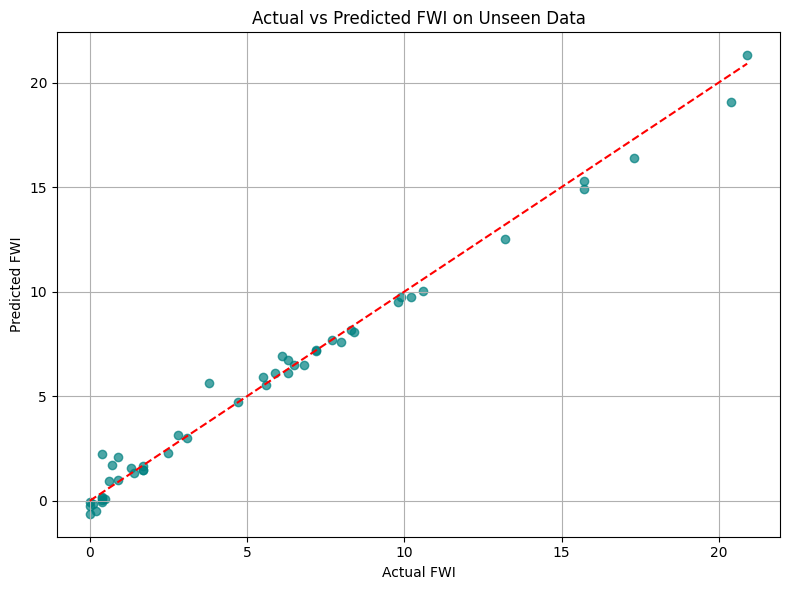

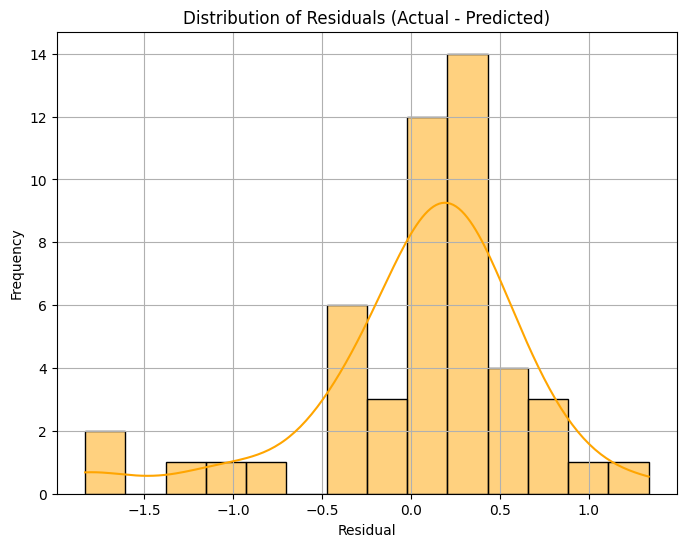


Model Evaluation on Unseen Test Data:
MAE  : 0.4240
MSE  : 0.3554
RMSE : 0.5962
R² Score : 0.9883


In [19]:
#Using best performing model which is Linear Regression
best_model = linear_model

unseen_pred = best_model.predict(X_test_scaled)

#Visualizing the comparision between actual vs predicted FWI on Unseen Data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, unseen_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Actual vs Predicted FWI on Unseen Data')
plt.grid(True)
plt.tight_layout()
plt.show()

#Visualization for Residual Plot
residuals = y_test - unseen_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Distribution of Residuals (Actual - Predicted)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#Evaluation of model performance on unseen data
mae = mean_absolute_error(y_test, unseen_pred)
mse = mean_squared_error(y_test, unseen_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, unseen_pred)

#Prining valuation metric on unseen data
print("\nModel Evaluation on Unseen Test Data:")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R² Score : {r2:.4f}")



Analysis of Results
- The strong alignment between actual and predicted values in graph indicates high confidence in model's reliability.
- Model has R2 Score of 0.9883, indicating it has a strong fit and is capturing relationships in the data very well.
- Mean Absolute Error (MAE) is 0.4240 which is low,indicating model's robustness to outliers.
- Low MSE and RMSE indicating errors are minimal.  

# Conclusion

In this project, I built and evaluated several regression models to predict the Fire Weather Index (FWI) using weather and fire behavior data. After scaling the features and tuning hyperparameters, I found that the Linear Regression model was still performing best for the given dataset.

The top model achieved strong results on unseen data, with an R² score of 0.9883 and low error metrics (MAE: 0.4240, RMSE: 0.5962). The actual vs. predicted plot showed a tight alignment, confirming good predictive accuracy.

Overall, this modeling approach effectively captures the patterns in the data and provides reliable predictions for fire risk assessment.